In [70]:
import numpy as np
import pandas as pd
import numpy.matlib
import scipy as sc
import random
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, LabelBinarizer
from sklearn.metrics import accuracy_score
# from lpproj import LocalityPreservingProjection
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10, fashion_mnist

# from lpproj import LocalityPreservingProjection

%matplotlib inline

In [2]:
# Simple KNN Classifier
def knn_cls(Xtrain, Xtest, ytrain, ytest): 
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(Xtrain, ytrain.ravel())
    score = model.score(Xtest, ytest.ravel())
    
    return score

In [3]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svm_cls(self):
        model = svm.SVC(C=200,kernel='rbf',gamma=0.01)

        return model

In [95]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255
X = X_train[:500]
y = y_train[:500]
X.shape

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

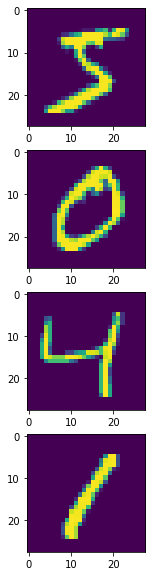

In [96]:
fig, ax = plt.subplots(4, 1, figsize=(3, 10))
ax[0].imshow(X[0].reshape(28,28))
ax[1].imshow(X[1].reshape(28,28))
ax[2].imshow(X[2].reshape(28,28))
ax[3].imshow(X[3].reshape(28,28))

In [114]:
nComp = 10
mu = np.mean(X, axis=0)
pca = PCA(n_components=nComp)
pca.fit(X)
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

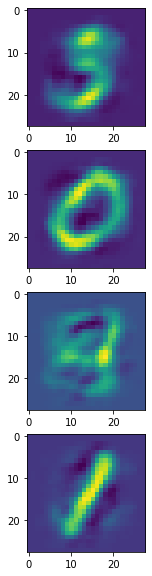

In [115]:
fig, ax = plt.subplots(4, 1, figsize=(3, 10))
ax[0].imshow(Xhat[0].reshape(28,28))
ax[1].imshow(Xhat[1].reshape(28,28))
ax[2].imshow(Xhat[2].reshape(28,28))
ax[3].imshow(Xhat[3].reshape(28,28))

In [116]:
from scipy.spatial.distance import cdist

dist = cdist(X, Xhat, 'euclidean')
np.mean(np.diag(dist))

4.840878436542943

In [117]:
score = knn.score(Xhat, y)
score

0.766

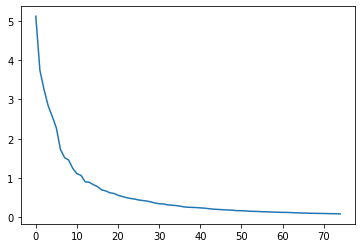

In [72]:
plt.plot(pca.explained_variance_[:75])

In [62]:
ind = np.random.choice(X_train.shape[0], 1000, replace=False)
X, y = X_train[ind], y_train[ind]
X_pca = pca.fit_transform(X)

cv = GridSearchCV(svm.SVC(), param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']},
                 refit=True, verbose=0)
cv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print(cv.best_estimator_)
print(cv.best_score_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.924


In [64]:
ind = np.random.choice(X_train.shape[0], 1000, replace=False)
X, y = X_train[ind], y_train[ind]
X, y = X_train[ind], y_train[ind]
X_pca = pca.fit_transform(X)

cv = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors':[2,5,6,10,12,15]})
cv.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 5, 6, 10, 12, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)